In [2]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [4]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [10]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      # Your code starts here
      labels = []
      images = []
      training_file.readline()
      for line in training_file:
         l = line.split(',')
         labels.append(l[0])
         images.append(np.array(l[1:785]).reshape((28, 28)))
      # Your code ends here
    return np.array(images).astype('float'), np.array(labels).astype('float')


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [11]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis = 3) # Your Code Here
testing_images = np.expand_dims(testing_images, axis = 3) # Your Code Here

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    # Your Code Here
    rescale=1/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(
    # Your Code Here
    rescale=1/255.0
    )
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [12]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Your Code Here
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile Model. 
model.compile(
    # Your Code Here
    loss= 'sparse_categorical_crossentropy',
    optimizer= 'adam',
    metrics=['acc'] 
)

# Train the Model
history = model.fit_generator(
    # Your Code Here
    train_datagen.flow(training_images, training_labels, batch_size=20),
    steps_per_epoch = (len(training_images)/20)+1,
    epochs =20,
    validation_data = validation_datagen.flow(testing_images, testing_labels ,batch_size =20),
    validation_steps = (len(testing_images)/20)+1,
    )

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Epoch 1/20
1374/1373 [==============================] - 12s 9ms/step - loss: 2.5186 - acc: 0.2206 - val_loss: 1.4524 - val_acc: 0.5317
Epoch 2/20
1374/1373 [==============================] - 12s 9ms/step - loss: 1.6380 - acc: 0.4689 - val_loss: 0.9199 - val_acc: 0.6559
Epoch 3/20
1374/1373 [==============================] - 12s 9ms/step - loss: 1.2360 - acc: 0.5934 - val_loss: 0.6587 - val_acc: 0.7996
Epoch 4/20
1374/1373 [==============================] - 12s 9ms/step - loss: 1.0146 - acc: 0.6629 - val_loss: 0.5293 - val_acc: 0.8224
Epoch 5/20
1374/1373 [==============================] - 12s 9ms/step - loss: 0.8296 - acc: 0.7221 - val_loss: 0.4678 - val_acc: 0.8213
Epoch 6/20
1374/1373 [==============================] - 12s 9ms/step - loss: 0.7146 - acc: 0.7638 - val_loss: 0.3566 - val_acc: 0.8793
Epoch 7/20
1374/1373 [==============================] - 12s 9ms/step - loss: 0.6413 - acc: 0.7888 - val_loss: 0.3458 - val_acc: 0.8885
Epoch 8/20
1374/1373 [==============================] -

[6.92426086682151, 0.56609035]

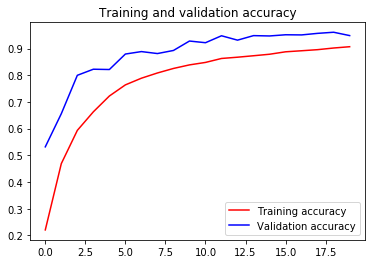

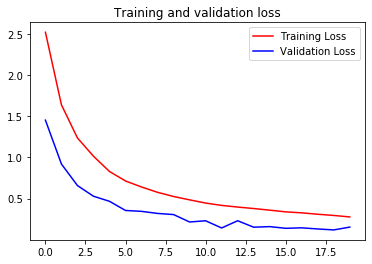

In [14]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['acc']# Your Code Here
val_acc = history.history['val_acc']# Your Code Here
loss = history.history['loss']# Your Code Here
val_loss = history.history['val_loss']# Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
testing_images = testing_images/255.0
model.evaluate(testing_images, testing_labels)


7172/7172 [==============================] - 0s 53us/sample - loss: 0.1538 - acc: 0.9485


[0.1537741975670777, 0.9485499]